In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import imageio

from skimage import data, segmentation, color
from skimage.future import graph

# Setting the font size for all plots.
matplotlib.rcParams['font.size'] = 9

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


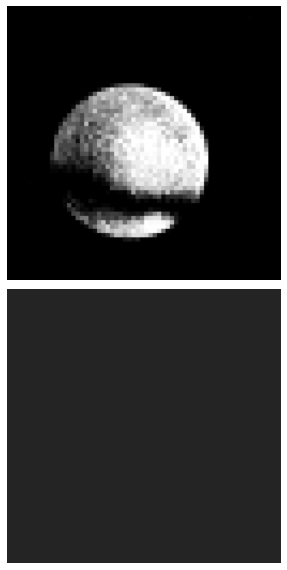

In [11]:
stack = imageio.mimread('embryo.tif')
np_stack = np.asarray(stack)

img = np_stack[0]

# img = (img >> 8).astype('uint8')

labels1 = segmentation.slic(img, compactness=0.1, n_segments=4000,
                            start_label=1)
out1 = color.label2rgb(labels1, img, kind='avg', bg_label=0)

g = graph.rag_mean_color(img, labels1, mode='similarity')
labels2 = graph.cut_normalized(labels1, g)
out2 = color.label2rgb(labels2, img, kind='avg', bg_label=0)

fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True, figsize=(6, 8))

ax[0].imshow(out1)
ax[1].imshow(out2)

for a in ax:
    a.axis('off')

plt.tight_layout()